## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
print enrollments[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as g:
    reader = unicodecsv.DictReader(g)
    daily_engagement = list(reader)

print daily_engagement[0]

with open('project_submissions.csv', 'rb') as h:
    reader = unicodecsv.DictReader(h)
    project_submissions = list(reader)
    
print project_submissions[0]


#write a function instead
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def get_unique_students(data):
    unique_students = dict()

    for line in data:
        try:
            unique_id = line['account_key']
        except:
            unique_id = line['acct']
        unique_students[unique_id] = unique_students.get(unique_id,0) + 1 #gives the count for each id

    return len(unique_students),len(data),unique_students


enrollment_num_rows = get_unique_students(enrollments)[1]
enrollment_num_unique_students = get_unique_students(enrollments)[0]

engagement_num_rows = get_unique_students(daily_engagement)[1]
engagement_num_unique_students = get_unique_students(daily_engagement)[0]

submission_num_rows = get_unique_students(project_submissions)[1]
submission_num_unique_students = get_unique_students(project_submissions)[0]

print 'enrollment_num_rows = ', enrollment_num_rows
print 'enrollment_num_unique_students =', enrollment_num_unique_students, '\n'

print 'engagement_num_rows =', engagement_num_rows
print 'engagement_num_unique_students =', engagement_num_unique_students, '\n'

print 'submission_num_rows =', submission_num_rows
print 'submission_num_unique_students =', submission_num_unique_students, '\n'

enrollment_num_rows =  1640
enrollment_num_unique_students = 1302 

engagement_num_rows = 136240
engagement_num_unique_students = 1237 

submission_num_rows = 3642
submission_num_unique_students = 743 



## Investigating the Data: Alternative Method

In [8]:
len(enrollments)

1640

In [9]:
unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
len(unique_enrolled_students)

1302

In [10]:
len(daily_engagement)

136240

In [11]:
unique_engagement_students = set()
for engagement in daily_engagement:
    try:
        unique_engagement_students.add(engagement['account_key'])
    except:
        unique_engagement_students.add(engagement['acct'])        
len(unique_engagement_students)

1237

In [12]:
len(project_submissions)

3642

In [13]:
unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
len(unique_project_submitters)

743

## Investigating the Data using a Function

In [14]:
unique_enrolled_students = get_unique_students(enrollments)[2]
len(unique_enrolled_students)

1302

In [15]:
unique_engagement_students = get_unique_students(daily_engagement)[2]
len(unique_engagement_students)

1237

In [16]:
unique_project_submitters = get_unique_students(project_submissions)[2]
len(unique_project_submitters)

743

## Problems in the Data

In [17]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".


for engagement in daily_engagement:
    engagement['account_key'] = engagement.pop('acct')
    #or
    #engagement['account_key'] = engagement['acct']
    #del engagement['acct']
    
    
print daily_engagement[0]['account_key']

0


## Missing Engagement Records

In [18]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

no_engagement = list()

for student in unique_enrolled_students:
    try:
        unique_engagement_students[student]
    except:
        #print 'No engagement record for:', student
        no_engagement.append(student)
        
print 'The following IDs have no engagement record:\n', no_engagement
print'\nThere are', len(no_engagement), 'IDs with no engagement record.'

The following IDs have no engagement record:
[u'1145', u'817', u'737', u'717', u'711', u'914', u'1069', u'1010', u'1025', u'1238', u'902', u'1213', u'749', u'1190', u'1171', u'1273', u'1284', u'1191', u'1304', u'707', u'799', u'1270', u'1120', u'654', u'1125', u'1148', u'884', u'889', u'1044', u'1222', u'997', u'996', u'926', u'1237', u'725', u'789', u'733', u'1218', u'1219', u'964', u'1129', u'968', u'1101', u'878', u'875', u'870', u'871', u'1155', u'819', u'1086', u'803', u'802', u'766', u'1079', u'1241', u'1291', u'981', u'841', u'664', u'1063', u'750', u'739', u'1186', u'727', u'728']

There are 65 IDs with no engagement record.


In [19]:
#From the instructor

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [20]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['days_to_cancel'] != 0:
        num_problem_students += 1
        print enrollment
print num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [21]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
print len(udacity_test_accounts)
print udacity_test_accounts

6
set([u'1304', u'1069', u'448', u'312', u'818', u'1101'])


In [22]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [23]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)
print non_udacity_engagement[0:5]

1622
135656
3634
[{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 37.2848873333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 53.6337463333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 33.4892696667, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 64.7796776667, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}]


## Refining the Question

In [24]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for at least 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for element in non_udacity_enrollments:
    
    if element['days_to_cancel'] is None or element['days_to_cancel'] > 7:
        
        paid_students[element['account_key']] = element['join_date']
        
print len(paid_students)

995


In [25]:
#From the instructor
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        #verifies the oldest enrollment date is in the dictionary for a given account key
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

print len(paid_students)
print paid_students.values()[0:11]

995
[datetime.datetime(2015, 3, 4, 0, 0), datetime.datetime(2015, 4, 2, 0, 0), datetime.datetime(2015, 8, 21, 0, 0), datetime.datetime(2015, 5, 12, 0, 0), datetime.datetime(2015, 7, 9, 0, 0), datetime.datetime(2015, 1, 11, 0, 0), datetime.datetime(2015, 1, 7, 0, 0), datetime.datetime(2014, 12, 8, 0, 0), datetime.datetime(2015, 4, 5, 0, 0), datetime.datetime(2015, 4, 1, 0, 0), datetime.datetime(2015, 5, 10, 0, 0)]


## Getting Data from First Week

In [26]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [27]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = list()
    
for engagement in non_udacity_engagement:
    account_key = engagement['account_key']
    engagement_date = engagement['utc_date']
    
    try:
        if within_one_week(paid_students[account_key],engagement_date):
            paid_engagement_in_first_week.append(engagement)
    except:
        continue

print len(paid_engagement_in_first_week)

6919


In [28]:
#Solution 7 from instructor

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [29]:
#Solution 7 from instructor continued

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [30]:
#this block of code is added to complete #10 below
#this block adds a key/value pair for having visited on a given day
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [31]:
#Solution 7 from instructor continued

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)
print paid_engagement_in_first_week[0:5]

[{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 37.2848873333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 53.6337463333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 33.4892696667, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 64.7796776667, u'projects_completed': 0, 'account_key': u'0', 

## Exploring Student Engagement

In [32]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    
#print engagement_by_account.items()

In [33]:
#from instructor to replace previous code
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

In [34]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [35]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [36]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

In [37]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.7332644989997

In [38]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

## Lessons Completed in First Week

In [39]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

import numpy as np

def first_week_stats(value_seeking):
    total_by_account = {}
    for account_key, value_for_student in engagement_by_account.items():
        total = 0
        for record in value_for_student:
            total += record[value_seeking]
        total_by_account[account_key] = total
        
    total_value_seeking = total_by_account.values()
        
    print 'Mean:', np.mean(total_value_seeking)
    print 'Standard deviation:', np.std(total_value_seeking)
    print 'Minimum:', np.min(total_value_seeking)
    print 'Maximum:', np.max(total_value_seeking)
    
    return total_value_seeking

total_lessons_by_account = first_week_stats('lessons_completed')

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [40]:
#from instructor to replace previous
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')


import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Number of Visits in First Week

In [41]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def sum_grouped_items2(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            if data_point[field_name] != 0:
                total += 1
        summed_data[key] = total
    return summed_data


total_visits_by_account = sum_grouped_items2(engagement_by_account, 'num_courses_visited')
describe_data(total_visits_by_account.values())
#or

days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7
Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [42]:
#Reminder of what the data structure looks like
paid_submissions[102]

{u'account_key': u'641',
 u'assigned_rating': u'PASSED',
 u'completion_date': datetime.datetime(2015, 5, 21, 0, 0),
 u'creation_date': datetime.datetime(2015, 5, 13, 0, 0),
 u'lesson_key': u'3184238632',
 u'processing_state': u'EVALUATED'}

In [43]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_submission = set() #a set only allows unique elements
non_passing_submission = set()
   
for blah in paid_submissions:
    
    if ((blah['assigned_rating'] == 'PASSED' or blah['assigned_rating'] == 'DISTINCTION') and 
        (blah['lesson_key'] in subway_project_lesson_keys)):
        passing_submission.add(blah['account_key'])
    
    elif ((blah['assigned_rating'] != 'PASSED' or blah['assigned_rating'] != 'DISTINCTION') and
         (blah['lesson_key'] == '746169184' or blah['lesson_key'] == '3176718735')):
        non_passing_submission.add(blah['account_key'])
            
print 'Submission Not Passing:', len(non_passing_submission)
print 'Submission Passing:', len(passing_submission)

Submission Not Passing: 481
Submission Passing: 647


In [44]:
#11 from the instructor

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

print 'Submission Passing:', len(pass_subway_project)

Submission Passing: 647


In [45]:
#11 continued from instructor
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print 'Engaged and passing:', len(passing_engagement)
print 'Engaged, but not passing:', len(non_passing_engagement)

Engaged and passing: 4527
Engaged, but not passing: 2392


## Comparing the Two Student Groups

### Engagement Record by Account for Passing & Not Passing

In [46]:
print 'passing_engagement'
print passing_engagement[0], '\n'

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
    
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

print 'passing_engagement_by_account'
print passing_engagement_by_account['0'][0] #prints first engagement for account '0'

passing_engagement
{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)} 

passing_engagement_by_account
{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


### Minutes Spent

In [47]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
  
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')

print 'Statistics: minutes_visited for Students Who Pass:'
describe_data(passing_minutes.values())
    
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')

print "\nStatistics: minutes_visited for Students Who Don't Pass:"
describe_data(non_passing_minutes.values())

Statistics: minutes_visited for Students Who Pass:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645

Statistics: minutes_visited for Students Who Don't Pass:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


### Lessons Completed

In [48]:
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')

print 'Statistics: lessons_completed for Students Who Pass:'
describe_data(passing_lessons.values())

non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')

print "\nStatistics: lessons_completed for Students Who Don't Pass:"
describe_data(non_passing_lessons.values())

Statistics: lessons_completed for Students Who Pass:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36

Statistics: lessons_completed for Students Who Don't Pass:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


### Days Visited

In [49]:
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')

print 'Statistics: has_visited for Students Who Pass:'
describe_data(passing_visits.values())

non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')

print "\nStatistics: has_visited for Students Who Don't Pass:"
describe_data(non_passing_visits.values())

Statistics: has_visited for Students Who Pass:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7

Statistics: has_visited for Students Who Don't Pass:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Import Daily Engagement Full

In [ ]:
#import the full daily engagement data
full_daily_engagement = read_csv('daily_engagement_full.csv')

# Clean up the data types in the engagement table
for engagement_record in full_daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['has_visited'] = int(float(engagement_record['has_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    engagement_record['registration_date'] = parse_date(engagement_record['registration_date'])
    engagement_record['subscription_start'] = parse_date(engagement_record['subscription_start'])
    
full_daily_engagement[0]

## Making Histograms

### Update the describe_data function

In [52]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


### Minutes

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


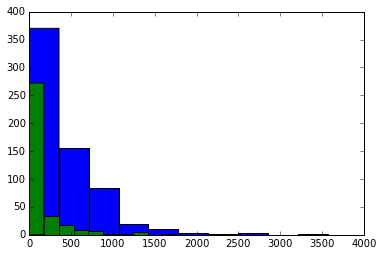

In [53]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

describe_data(passing_minutes.values())
describe_data(non_passing_minutes.values())

### Lessons

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


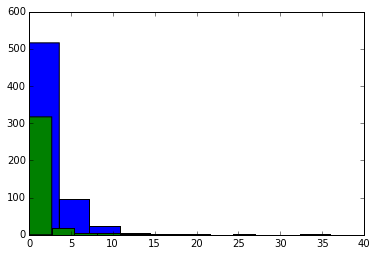

In [54]:
describe_data(passing_lessons.values())
describe_data(non_passing_lessons.values())

### Visits

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


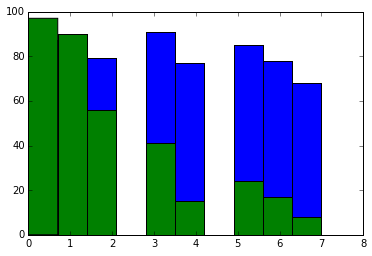

In [55]:
describe_data(passing_visits.values())
describe_data(non_passing_visits.values())

## Improving Plots and Sharing Findings

Populating the interactive namespace from numpy and matplotlib


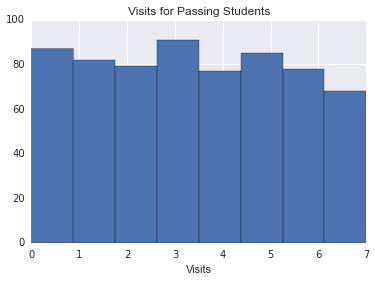

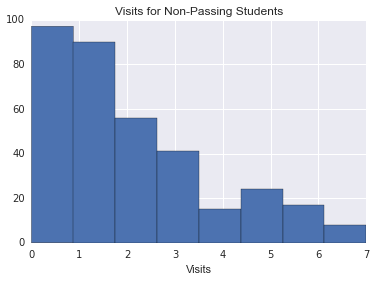

In [60]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

%pylab inline
plt.hist(passing_visits.values(),bins=8)
plt.xlabel('Visits')
plt.title('Visits for Passing Students')
plt.show()
plt.hist(non_passing_visits.values(),bins=8)
plt.xlabel('Visits')
plt.title('Visits for Non-Passing Students')
plt.show()

## From Instructor

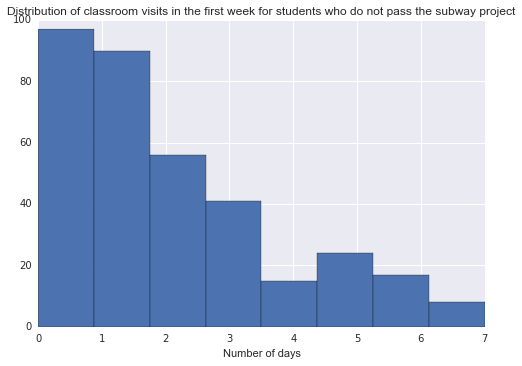

In [57]:
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

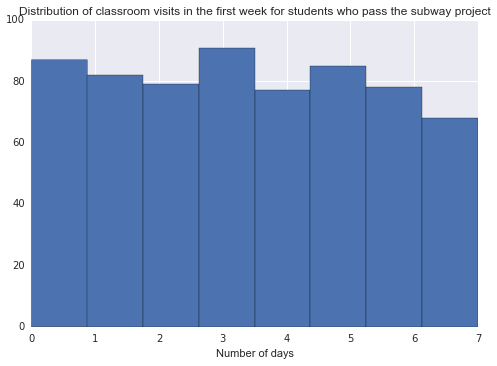

In [58]:
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')